In [1]:
import cv2
import numpy as np

In [54]:
def preprocessing(img_path):
  img=cv2.imread(img_path)
  gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur_img=cv2.GaussianBlur(gray_img,(7,7),1)
  canny_img=cv2.Canny(blur_img,40,40)
  kernel=np.ones((5,5))
  dilate_img=cv2.dilate(canny_img,kernel,iterations=3)
  erode_img=cv2.erode(dilate_img,kernel,iterations=2)
  return erode_img,img

In [57]:
img_path = "/config/workspace/artifacts/vegi_detector/crop_imgs/2.jpg"
im1,im2 = preprocessing(img_path)

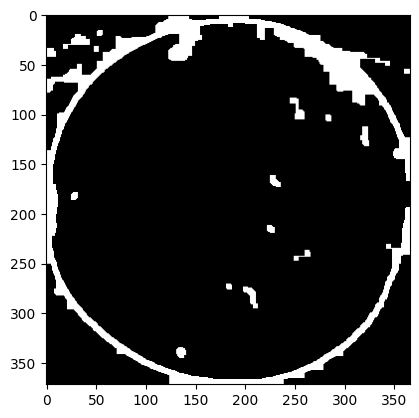

In [58]:
import matplotlib.pyplot as plt
plt.imshow(im1,"gray")

In [59]:
def get_contours(img_path,area_thersold=1500,filter=4,draw=False):
  canny_img,img=preprocessing(img_path)
  contours,hig=cv2.findContours(canny_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  final_dict={}
  for cnt in contours:
    area=cv2.contourArea(cnt)
    if area>area_thersold:
      print(area)

In [27]:
get_contours("/config/workspace/artifacts/vegi_detector/crop_imgs/2.jpg")

9622.5


In [60]:

get_contours("/config/workspace/artifacts/vegi_detector/crop_imgs/1.jpg")

1564.5
9132.0
13613.5
3168.0
21624.0
55776.5


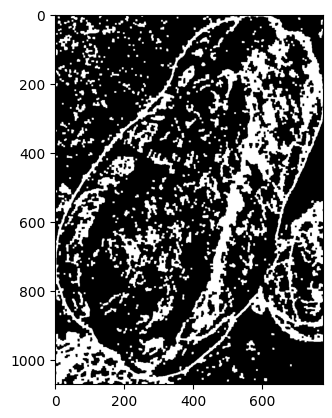

In [10]:
import matplotlib.pyplot as plt
plt.imshow(im1,"gray")

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

In [18]:

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [19]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-08-25 19:23:13--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.158.46.30, 108.158.46.73, 108.158.46.39, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.158.46.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  1.46MB/s    in 11m 4s  

2023-08-25 19:34:17 (3.69 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [1]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

In [2]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

: 

: 

In [1]:

predictor = SamPredictor(sam)
     

: 

: 

In [ ]:
input_point = np.array([[(982 +355)/2,(1517 +416)/2]])
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(imarr,cv2.COLOR_BGR2RGB))
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()